In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, Flatten

In [2]:
DataFrame = pd.read_csv(r"C:\Users\Teja Nikhil\DL-SIP\Pre-processed_Collected_CSV.csv")

In [3]:
mapping = {float(0.0):'A', float(2.5): 'B', float(5.0): 'C', float(7.5): 'D', float(10.0): 'F'}
DataFrame['Grades'] = DataFrame['Grades'].map(mapping)

In [4]:
mapping = {"A":0, "B": 1, "C": 2, "D": 3, "F": 4}
DataFrame['Grades'] = DataFrame['Grades'].map(mapping)

In [5]:
DataFrame.Grades

0       0
1       0
2       0
3       4
4       4
       ..
1254    4
1255    4
1256    4
1257    2
1258    4
Name: Grades, Length: 1259, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(DataFrame["Padded_Sentence"], DataFrame["Grades"], test_size=0.2, random_state=42)

In [7]:
train_text_data = train_X
test_text_data = test_X

In [8]:
tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(train_text_data)

In [100]:
vocab_size = len(tokenizer.word_index) + 1 

In [9]:
tokenizer.word_index

{'null': 1,
 'the': 2,
 'is': 3,
 'in': 4,
 'of': 5,
 'a': 6,
 'and': 7,
 'you': 8,
 'to': 9,
 'for': 10,
 'how': 11,
 'data': 12,
 'class': 13,
 'are': 14,
 'what': 15,
 '2': 16,
 'trees': 17,
 'that': 18,
 'one': 19,
 'missing': 20,
 'information': 21,
 'vectors': 22,
 'fill': 23,
 'when': 24,
 'do': 25,
 'classifier': 26,
 'two': 27,
 'decision': 28,
 'name': 29,
 'used': 30,
 'explain': 31,
 'or': 32,
 'set': 33,
 'an': 34,
 'can': 35,
 'mean': 36,
 'your': 37,
 'with': 38,
 'it': 39,
 'value': 40,
 'function': 41,
 'svm': 42,
 'attribute': 43,
 'we': 44,
 'after': 45,
 'kernel': 46,
 'all': 47,
 'by': 48,
 'not': 49,
 'values': 50,
 'distance': 51,
 'bias': 52,
 'gain': 53,
 'height': 54,
 'inductive': 55,
 'be': 56,
 'this': 57,
 '\xa0': 58,
 'sinusoids': 59,
 'orthogonal': 60,
 'would': 61,
 'on': 62,
 'from': 63,
 'boys': 64,
 'machine': 65,
 'overfitting': 66,
 'independent': 67,
 'zero': 68,
 'bagging': 69,
 'girls': 70,
 'some': 71,
 'provide': 72,
 'gradient': 73,
 'become'

In [101]:
train_sequences = tokenizer.texts_to_sequences(train_text_data)
test_sequences = tokenizer.texts_to_sequences(test_text_data)

In [102]:
max_seq_length = max([len(i) for i in train_sequences])
max_seq_length

71

In [103]:
train_padded_sequences = pad_sequences(train_sequences, maxlen=max_seq_length, padding='post')
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_seq_length, padding='post')

In [90]:
?model.fit

In [108]:
set(list(train_y))

{0, 1, 2, 3, 4}

In [123]:
?Embedding

In [216]:
# Define the CNN model
model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=32, input_length=max_seq_length))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
# model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=5, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [224]:
import time
train1_start = time.time()
history = model.fit(train_padded_sequences, train_y, epochs=20, validation_split = 0.2)
train1_stop = time.time()
print(train1_stop-train1_start)

Epoch 1/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0736 - accuracy: 0.9876 - val_loss: 0.5204 - val_accuracy: 0.8465
Epoch 2/20
26/26 [==============================] - 0s 4ms/step - loss: 0.0665 - accuracy: 0.9876 - val_loss: 0.5246 - val_accuracy: 0.8564
Epoch 3/20
26/26 [==============================] - 0s 4ms/step - loss: 0.0589 - accuracy: 0.9901 - val_loss: 0.5306 - val_accuracy: 0.8465
Epoch 4/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.9901 - val_loss: 0.5335 - val_accuracy: 0.8564
Epoch 5/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9901 - val_loss: 0.5412 - val_accuracy: 0.8515
Epoch 6/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9901 - val_loss: 0.5637 - val_accuracy: 0.8366
Epoch 7/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0500 - accuracy: 0.9888 - val_loss: 0.5492 - val_accuracy: 0.8564
Epoch 8/20
26/26 [==

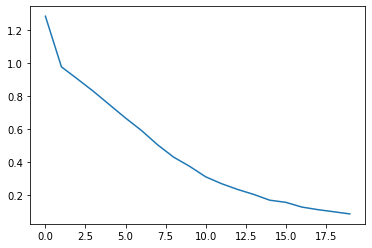

In [218]:
plt.plot(history.history["loss"])

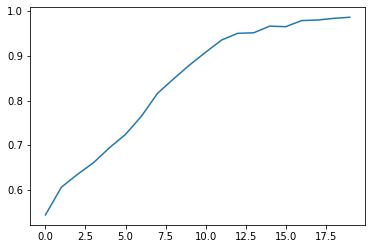

In [219]:
plt.plot(history.history["accuracy"])

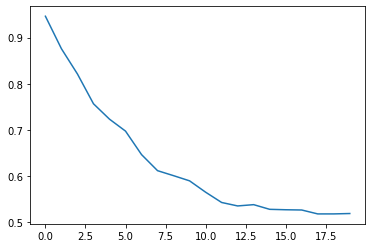

In [220]:
plt.plot(history.history["val_loss"])

In [221]:
test_x_valid = np.expand_dims(test_padded_sequences,axis=1)
train_x_valid = np.expand_dims(train_padded_sequences,axis=1)

In [222]:
train_pred_labels = [np.argmax(model.predict(i)) for i in train_x_valid]
test_pred_labels = [np.argmax(model.predict(i)) for i in test_x_valid]

In [191]:
true_labels = test_y

In [192]:
from sklearn.metrics import confusion_matrix

In [193]:
cm = confusion_matrix(true_labels, test_pred_labels)

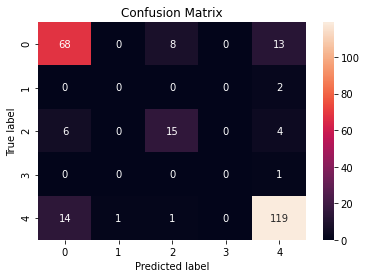

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [195]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
train_accuracy = accuracy_score(train_y, train_pred_labels)*100
test_accuracy = accuracy_score(test_y, test_pred_labels)*100
precision = precision_score(test_y, test_pred_labels, average='weighted')
recall = recall_score(test_y, test_pred_labels, average='weighted')
f1score = f1_score(test_y, test_pred_labels,average='weighted')

C:\Users\Teja Nikhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [196]:
print("Training Accuracy : {:.2f}%".format(train_accuracy))
print("Testing Accuracy : {:.2f}%".format(test_accuracy))
print("Precision : {:.2f}%".format(precision))
print("Recall : {:.2f}%".format(recall))
print("f1score : {:.2f}%".format(f1score))

Training Accuracy : 93.64%
Testing Accuracy : 80.16%
Precision : 0.79%
Recall : 0.80%
f1score : 0.80%
